In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# loading images

288
384


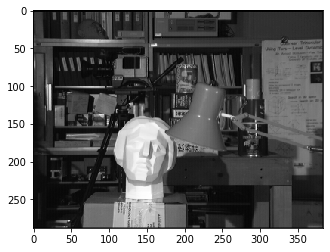

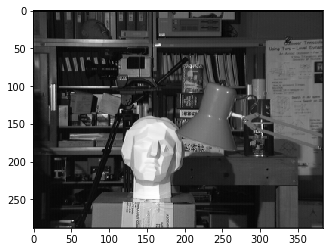

In [ ]:
imgL = cv2.imread('StereoL1.png',0)
imgR = cv2.imread('StereoR1.png',0)
plt.figure()
plt.imshow(imgL, cmap="gray")
plt.figure()
plt.imshow(imgR, cmap="gray")

rows, cols = imgL.shape
print(rows)
print(cols)


# generating desparity map using BM

In [ ]:
disparityImgSAD = np.zeros(imgR.shape)
disparityImgSSD = np.zeros(imgR.shape)
disparityImg = np.zeros(imgR.shape)
# checking if both images are same shape
print(disparityImgSAD.shape)
print(disparityImgSSD.shape)

(288, 384)
(288, 384)


## using SAD only

In [ ]:
D = 16
halfWindow = 2
Window = 2 * halfWindow + 1

for r in range(rows):
  #Get the minimum and maximum row boundries, if the window lies outside
  #the picture in the upper part it will be 0, if the lower side it wil
  #be the height of the image
  min_row = max(0, r - halfWindow)
  max_row = min(rows-1, r + halfWindow)

  for h in range(cols):
    #Get the minimum and maximum column boundries, if the window lies outside
    #the picture in the left part it will be 0, if the right side it wil
    #be the width of the image
    min_col = max(0, h - halfWindow)
    max_col = min(cols-1, h + halfWindow)

    #Get the number of the displacment of the window in the left and right side
    min_D = max(-D, - min_col)
    max_D = min(D, cols - max_col - 1)

    #Get the patch in the left image
    temp = imgR[min_row:max_row, min_col:max_col].astype(int)

    #Number of blocks
    num_blocks = max_D - min_D

    SAD = np.zeros([num_blocks,1])

    for i in range(min_D, max_D):
      
      block = imgL[min_row:max_row, (min_col + i):(max_col + i)].astype(int)
      block_index = i - min_D
      SAD[block_index, 0] = sum(sum(abs(temp - block)))

    match_index = np.argsort(SAD, axis=0)[0][0]
    d = abs(match_index  + min_D)

    disparityImg[r,h] = d*255/8    

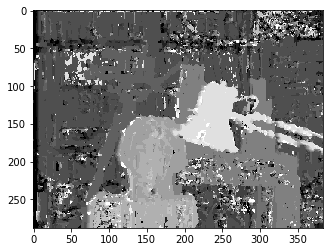

In [ ]:
plt.imshow(disparityImg, cmap="gray")

## using SSD and SAD

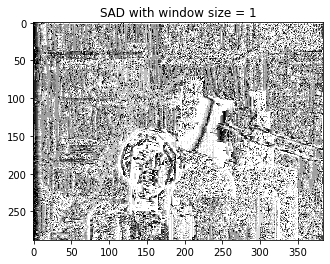

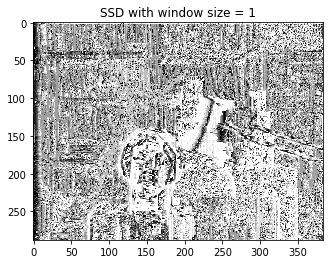

In [ ]:
D = 8

for r in range(rows):

  for h in range(cols):
    #Get the number of the displacment of the window in the left and right side
    min_D = max(-D, - h)
    max_D = min(D, cols - h - 1)

    #Get the patch in the left image
    temp = imgR[r, h].astype(int)

    #Number of blocks
    num_blocks = max_D - min_D

    SAD = np.zeros([num_blocks,1])
    SSD = np.zeros([num_blocks,1])
    # Search in the disparity range
    for i in range(min_D, max_D):
      # Get the corresponding block in the second image
      block = imgL[r, h+i].astype(int)
      block_index = i - min_D
      SAD[block_index, 0] = abs(temp - block)
      SSD[block_index, 0] = (temp - block)**2
    # Get the most similar block
    match_indexSAD = np.argsort(SAD, axis=0)[0]
    match_indexSSD = np.argsort(SSD, axis=0)[0][0]
    d_SAD = abs(match_indexSAD  + min_D)
    d_SSD = abs(match_indexSSD + min_D)
    disparityImgSAD[r,h] = d_SAD*255/8
    disparityImgSSD[r,h] = d_SSD*255/8
plt.figure()
plt.title("SAD with window size = 1")
plt.imshow(disparityImgSAD, cmap="gray")

plt.figure()
plt.title("SSD with window size = 1")
plt.imshow(disparityImgSSD, cmap="gray")

## different window size

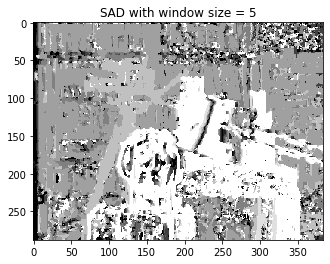

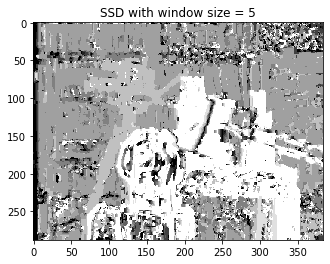

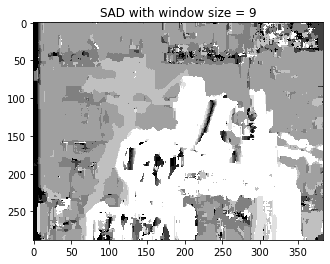

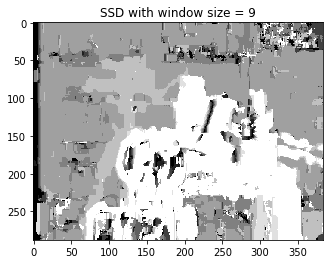

In [ ]:
D = 8
halfWindow = [2,4]

disparityImg
for hw in halfWindow:
  for r in range(rows):
    #Get the minimum and maximum row boundries, if the window lies outside
    #the picture in the upper part it will be 0, if the lower side it wil
    #be the height of the image
    min_row = max(0, r - hw)
    max_row = min(rows-1, r + hw)

    for h in range(cols):
      #Get the minimum and maximum column boundries, if the window lies outside
      #the picture in the left part it will be 0, if the right side it wil
      #be the width of the image
      min_col = max(0, h - hw)
      max_col = min(cols-1, h + hw)

      #Get the number of the displacment of the window in the left and right side
      min_D = max(-D, - min_col)
      max_D = min(D, cols - max_col - 1)

      #Get the patch in the left image
      temp = imgR[min_row:max_row, min_col:max_col].astype(int)

      #Number of blocks
      num_blocks = max_D - min_D

      SAD = np.zeros([num_blocks,1])
      SSD = np.zeros([num_blocks,1])

      #Search in the disparity range
      for i in range(min_D, max_D):
        #Get the corresponding block in the second image
        block = imgL[min_row:max_row, (min_col + i):(max_col + i)].astype(int)
        block_index = i - min_D
        SAD[block_index, 0] = np.sum(abs(temp - block))
        SSD[block_index, 0] = np.sum((temp - block)**2)
      #Get the most similar block
      match_index_SAD = np.argsort(SAD, axis=0)[0][0]
      match_index_SSD = np.argsort(SSD, axis=0)[0][0]
      d_SAD = abs(match_index_SAD + min_D)
      d_SSD = abs(match_index_SSD + min_D)
      disparityImgSAD[r,h] = d_SAD*255/8
      disparityImgSSD[r,h] = d_SSD*255/8
      
  plt.figure()
  plt.title("SAD with window size = " + str(hw*2+1))
  plt.imshow(disparityImgSAD, cmap="gray")

  plt.figure()
  plt.title("SSD with window size = " + str(hw*2+1))
  plt.imshow(disparityImgSSD, cmap="gray")